<a href="https://colab.research.google.com/github/tanvgen/Vlg-project/blob/main/low_light_enhancement_project%20using%20u-net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate,Cropping2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from keras.preprocessing.image import img_to_array, array_to_img

In [4]:
from google.colab import drive
from zipfile import ZipFile
drive.mount('/content/drive', force_remount=True)
archive_path = '/content/drive/My Drive/Train.zip'
with ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall('/content/Train')

Mounted at /content/drive


In [5]:
from tqdm import tqdm
noisy_data=[]

SIZE = 320
np.random.seed(42)
path1 = '/content/Train/Train/low/'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,1)
    print(img.shape)
    img=cv2.resize(img,(200,320))
    noisy_data.append(img_to_array(img))

  3%|▎         | 15/485 [00:00<00:06, 74.18it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


  7%|▋         | 33/485 [00:00<00:07, 58.70it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 11%|█         | 53/485 [00:00<00:05, 76.40it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 15%|█▍        | 72/485 [00:01<00:05, 82.30it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 17%|█▋        | 81/485 [00:01<00:07, 57.08it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 20%|██        | 97/485 [00:01<00:05, 65.21it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)

 24%|██▎       | 114/485 [00:01<00:05, 73.50it/s]


(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 27%|██▋       | 132/485 [00:01<00:04, 79.90it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 29%|██▉       | 141/485 [00:02<00:05, 58.74it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 32%|███▏      | 157/485 [00:02<00:04, 66.33it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 34%|███▍      | 165/485 [00:02<00:04, 68.93it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)

 37%|███▋      | 180/485 [00:02<00:04, 65.48it/s]


(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)

 40%|████      | 196/485 [00:02<00:04, 70.92it/s]


(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 44%|████▍     | 213/485 [00:03<00:03, 75.80it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 47%|████▋     | 230/485 [00:03<00:03, 77.67it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 51%|█████     | 247/485 [00:03<00:02, 79.57it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 54%|█████▍    | 264/485 [00:03<00:02, 80.75it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 59%|█████▊    | 284/485 [00:03<00:02, 89.46it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 63%|██████▎   | 306/485 [00:04<00:01, 97.08it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 67%|██████▋   | 327/485 [00:04<00:01, 98.26it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 72%|███████▏  | 349/485 [00:04<00:01, 101.22it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 76%|███████▋  | 371/485 [00:04<00:01, 102.93it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 81%|████████  | 393/485 [00:05<00:00, 99.40it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 85%|████████▌ | 414/485 [00:05<00:00, 100.52it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 90%|████████▉ | 436/485 [00:05<00:00, 102.33it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 94%|█████████▍| 458/485 [00:05<00:00, 101.77it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


 99%|█████████▉| 480/485 [00:05<00:00, 98.98it/s] 

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


100%|██████████| 485/485 [00:05<00:00, 81.44it/s]

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


In [6]:
clean_data=[]
path2 = '/content/Train/Train/high/'
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,1)  #Change 0 to 1 for color images
    img=cv2.resize(img,(200,320))
    clean_data.append(img_to_array(img))


100%|██████████| 485/485 [00:04<00:00, 111.03it/s]


In [7]:
clean_data[5].shape

(320, 200, 3)

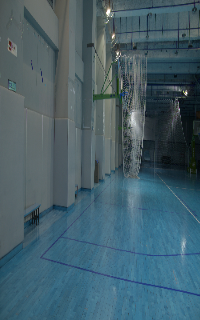

In [8]:
array_to_img(clean_data[90])

In [9]:
print(len(noisy_data))
print(len(clean_data))
noisy_train = np.reshape(noisy_data, (len(noisy_data), 320, 200, 3))
noisy_train = noisy_train.astype('float32') / 255.
noisy_train.shape

clean_train = np.reshape(clean_data, (len(clean_data), 320, 200, 3))
clean_train = clean_train.astype('float32') / 255.
clean_train.shape

485
485


(485, 320, 200, 3)

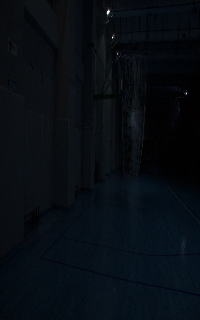

In [10]:
array_to_img(noisy_train[90])

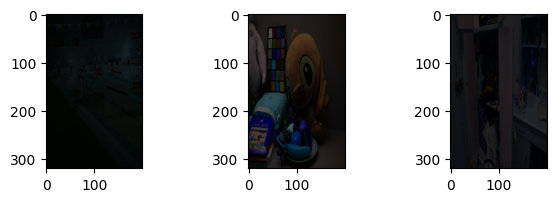

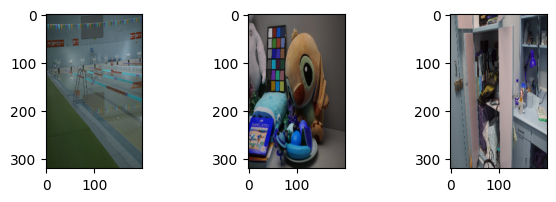

In [11]:
#Displaying images with noise
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(noisy_train[i].reshape(320, 200,3))
plt.show()

#Displaying clean images
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(320, 200,3), cmap="binary")
plt.show()

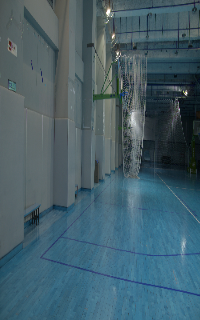

In [12]:
array_to_img(clean_train[90])

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(320, 200, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))


model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 320, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 160, 100, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 160, 100, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 80, 50, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 80, 50, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 40, 25, 8)         0

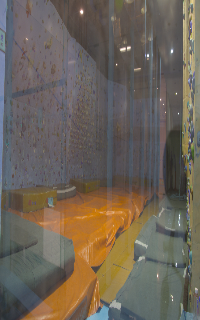

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, test_size = 0.20, random_state = 0)

array_to_img(y_train[4]*255)


In [15]:
model.fit(x_train, y_train, epochs=10, batch_size=16, shuffle=True, verbose = 1)

model.save('denoising_autoencoder.model')

def psnr(image1, image2):
  mse = np.mean((image1 - image2) ** 2)
  if mse == 0:  # Avoid division by zero
    return float('inf')
  max_pixel = 1.0  # Assuming images have 8-bit pixel values (0-255)
  psnr = 10 * np.log10(max_pixel**2 / mse)
  return psnr

# Evaluate model on test data
denoised_images = model.predict(x_test)

# Calculate PSNR for each test image (assuming clean_train is the ground truth)
psnr_values = []
for i in range(len(x_test)):
  original_image = clean_train[i]
  denoised_image = denoised_images[i]
  psnr_value = psnr(original_image, denoised_image)
  psnr_values.append(psnr_value)

# Print average PSNR
average_psnr = np.mean(psnr_values)
print("Average PSNR on Test Set:", average_psnr, "dB")

Epoch 1/10
25/25 [==============================] - 71s 3s/step - loss: 0.1219 - accuracy: 0.4404
Epoch 2/10
25/25 [==============================] - 68s 3s/step - loss: 0.0506 - accuracy: 0.2511
Epoch 3/10
25/25 [==============================] - 70s 3s/step - loss: 0.0422 - accuracy: 0.4842
Epoch 4/10
25/25 [==============================] - 68s 3s/step - loss: 0.0385 - accuracy: 0.4648
Epoch 5/10
25/25 [==============================] - 75s 3s/step - loss: 0.0375 - accuracy: 0.4801
Epoch 6/10
25/25 [==============================] - 71s 3s/step - loss: 0.0344 - accuracy: 0.4681
Epoch 7/10
25/25 [==============================] - 72s 3s/step - loss: 0.0325 - accuracy: 0.4809
Epoch 8/10
25/25 [==============================] - 73s 3s/step - loss: 0.0313 - accuracy: 0.4808
Epoch 9/10
25/25 [==============================] - 76s 3s/step - loss: 0.0314 - accuracy: 0.4832
Epoch 10/10
4/4 [==============================] - 4s 863ms/step
Average PSNR on Test Set: 12.56372985541243 dB


In [16]:
predicted_folder = "/content/Train/Train/predicted/"
os.makedirs(predicted_folder, exist_ok=True)

for i in range(len(x_test)):
   image_name = f"denoised_images{i}.png"  # Example filename format
   print(image_name)

   image_path = os.path.join(predicted_folder, image_name)
   print(f"Saving image to: {image_path}")

denoised_images0.png
Saving image to: /content/Train/Train/predicted/denoised_images0.png
denoised_images1.png
Saving image to: /content/Train/Train/predicted/denoised_images1.png
denoised_images2.png
Saving image to: /content/Train/Train/predicted/denoised_images2.png
denoised_images3.png
Saving image to: /content/Train/Train/predicted/denoised_images3.png
denoised_images4.png
Saving image to: /content/Train/Train/predicted/denoised_images4.png
denoised_images5.png
Saving image to: /content/Train/Train/predicted/denoised_images5.png
denoised_images6.png
Saving image to: /content/Train/Train/predicted/denoised_images6.png
denoised_images7.png
Saving image to: /content/Train/Train/predicted/denoised_images7.png
denoised_images8.png
Saving image to: /content/Train/Train/predicted/denoised_images8.png
denoised_images9.png
Saving image to: /content/Train/Train/predicted/denoised_images9.png
denoised_images10.png
Saving image to: /content/Train/Train/predicted/denoised_images10.png
denoised